In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv("Z:/Data/Monkeys/War Machine/2023-08-17/Videos/Deeplabcut/MVI_0288DLC_resnet50_RhodesInRigWithMarksAug18shuffle1_300000.csv", skiprows=3, header=None)

In [41]:
#Initialize variables
stimCmds  = [0, 8, 16, 24, 31, 39, 43, 47, 51, 55, 59, 67, 75, 82, 90]
stimTimes = [21, 28, 35, 41, 57, 64, 75, 81, 88, 94, 101 ,109 ,116, 124, 133, 140]
useFramesMove = [670, 889, 1073, 1246, 1725, 1944, 2275, 2470, 2665, 2855, 3072, 3304, 3517, 3745, 4036] #I think these are hand selected frames by matt for when the stim is happening?
label1 = ["Forearm", "Wrist", "Hand", "MCP", "PIP", "DIP"]
label2 = ["x", "y", "likelihood"]
videoHeight = 720
fps = 29.97
threshold = 0.75
window = 30
#flip y pixels
data.iloc[:,2::3] = videoHeight - data.iloc[:,2::3]  #not used

In [4]:
def calculate_angle(p1,p2, p3):
    #Calculate the angle at p2
    #Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    #Calculate the angle
    angle = np.arccos(np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    #Convert to degrees
    angle = np.degrees(angle)
    return angle

calculate_angle((1,0),(0,0),(0.5,0.5)) #output should be 45 degrees

45.00000000000001

In [27]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wrist = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    mcp = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    pip = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    dip = (data.iloc[i][data.columns[16]], data.iloc[i][data.columns[17]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

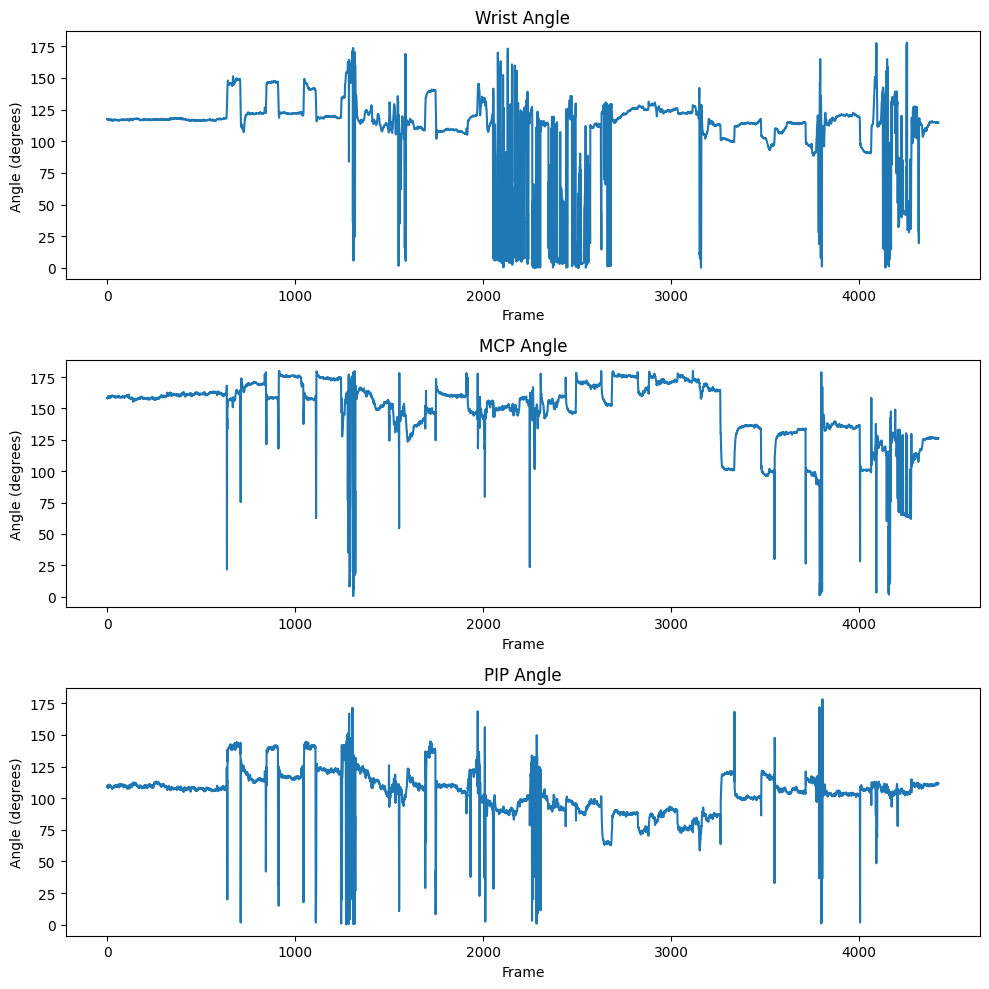

In [30]:
#Plotting Angles over Time
fig, axs = plt.subplots(3,1, figsize=(10,10))

axs[0].plot(wristAngle)
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Frame")
axs[0].set_ylabel("Angle (degrees)")

axs[1].plot(mcpAngle)
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Frame")
axs[1].set_ylabel("Angle (degrees)")

axs[2].plot(pipAngle)
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Frame")
axs[2].set_ylabel("Angle (degrees)")

plt.tight_layout()
plt.show()



In [59]:
# Taking a 1 second window around each stim command (30 fps)
wristStim = [np.mean(wristAngle[max(i-15, 0):min(i+15, len(wristAngle))]) for i in useFramesMove]
mcpStim = [np.mean(mcpAngle[max(i-15, 0):min(i+15, len(mcpAngle))]) for i in useFramesMove]
pipStim = [np.mean(pipAngle[max(i-15, 0):min(i+15, len(pipAngle))]) for i in useFramesMove]


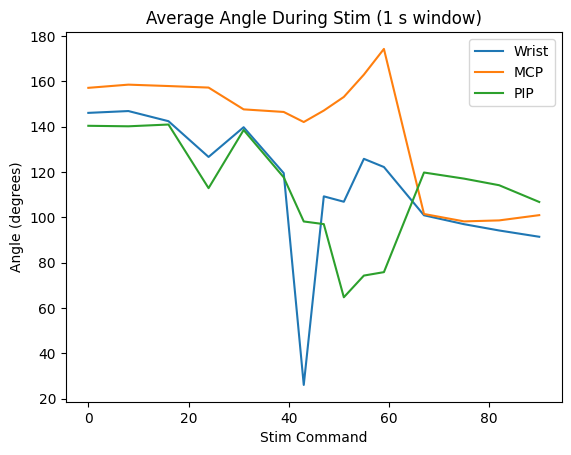

In [61]:
plt.plot(stimCmds, wristStim, label="Wrist")
plt.plot(stimCmds, mcpStim, label="MCP")
plt.plot(stimCmds, pipStim, label="PIP")
plt.legend()
plt.xlabel("Stim Command")
plt.ylabel("Angle (degrees)")
plt.title("Average Angle During Stim (1 s window)")
plt.show()

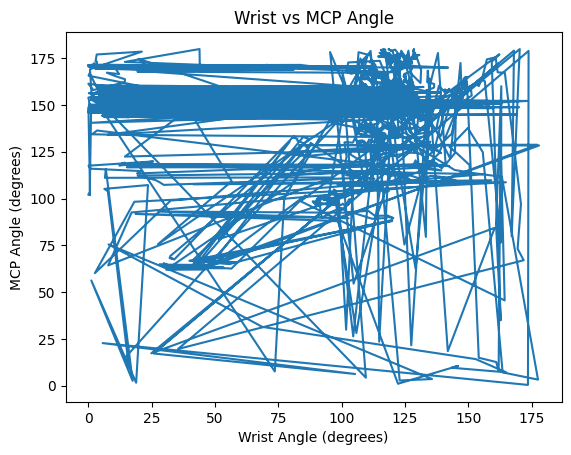

In [67]:
plt.plot(wristAngle,mcpAngle)
plt.title("Wrist vs MCP Angle")
plt.xlabel("Wrist Angle (degrees)")
plt.ylabel("MCP Angle (degrees)")
plt.show()

# To do
- Figure out how to remove noisy movement from data
  - Interpolation or sliding average?
- Make a command curve for each angle
- Account for low likelihoods from DLC